<a href="https://colab.research.google.com/github/TheSamHub/COVID-19-Detection/blob/main/COVID_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow_hub as hub

In [ ]:
! git clone https://github.com/education454/datasets.git  

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.67 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
base_dir='/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_covid_dir=os.path.join(train_dir,'COVID19')
train_normal_dir=os.path.join(train_dir,'NORMAL')
test_covid_dir=os.path.join(test_dir,'COVID19')
test_normal_dir=os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)
print(train_covid_names[1:10])
print(train_normal_names[1:10])
print(test_covid_names[1:10])
print(test_normal_names[1:10])


['COVID-19 (179).jpg', 'COVID-19 (8).jpeg', 'COVID19(86).jpg', 'COVID19(330).jpg', 'COVID19(564).jpg', 'COVID19(348).jpg', 'COVID19(302).jpg', 'COVID19(299).jpg', 'COVID19(87).jpg']
['NORMAL(1059).jpg', 'NORMAL(853).jpg', 'NORMAL(1473).jpg', 'NORMAL(1504).jpg', 'NORMAL(183).jpg', 'NORMAL(1155).jpg', 'NORMAL(503).jpg', 'NORMAL(46).jpg', 'NORMAL(71).jpg']
['COVID19(358).jpg', 'COVID-19 (773).jpg', 'COVID19(304).jpg', 'COVID19(121).jpg', 'COVID19(385).jpg', 'COVID-19 (609).jpg', 'COVID19(216).jpg', 'COVID19(450).jpg', 'COVID19(346).jpg']
['NORMAL(471).jpg', 'NORMAL(1245).jpg', 'NORMAL(922).jpg', 'NORMAL(1214).jpg', 'NORMAL(689).jpg', 'NORMAL(1430).jpg', 'NORMAL(500).jpg', 'NORMAL(1207).jpg', 'NORMAL(845).jpg']


In [ ]:
print("No.of train COVID images: ",len(train_covid_names))
print("No.of train NORMAL images: ",len(train_normal_names))
print("No.of test COVID images: ",len(test_covid_names))
print("No.of test NORMAL images: ",len(test_normal_names))
print("Total no.of train images: ",len(train_covid_names)+len(train_normal_names))
print("Total no.of train COVID images: ",len(test_covid_names)+len(test_normal_names))

No.of train COVID images:  545
No.of train NORMAL images:  1266
No.of test COVID images:  167
No.of test NORMAL images:  317
Total no.of train images:  1811
Total no.of train COVID images:  484


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


['/content/datasets/Data/train/COVID19/COVID19(407).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (179).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (8).jpeg', '/content/datasets/Data/train/COVID19/COVID19(86).jpg', '/content/datasets/Data/train/COVID19/COVID19(330).jpg', '/content/datasets/Data/train/COVID19/COVID19(564).jpg', '/content/datasets/Data/train/COVID19/COVID19(348).jpg', '/content/datasets/Data/train/COVID19/COVID19(302).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(489).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1059).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(853).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1473).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1504).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(183).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1155).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(503).jpg']


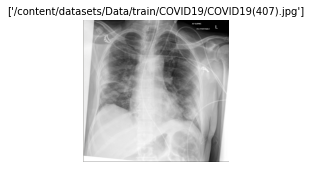

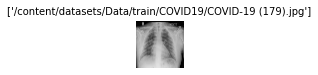

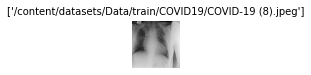

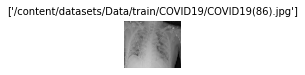

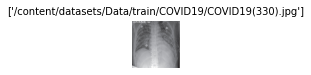

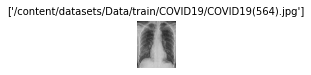

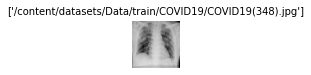

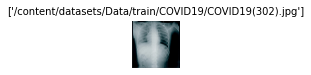

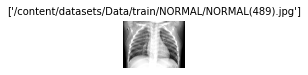

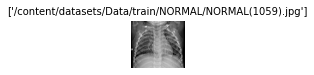

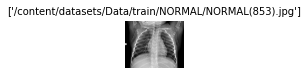

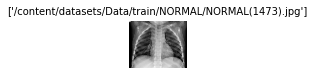

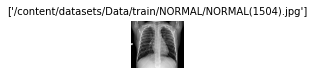

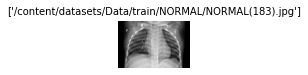

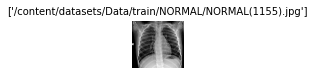

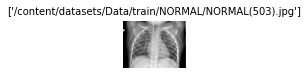

In [ ]:
import matplotlib.image as mpimg
#plot a grid of 16 images (8 images of COVID 19 , 8 images of NORMAL)
 
#set the no.of rows and columns
nrows=4
ncols=4
#set the figure size
fig=plt.gcf() # plt.gcf gives us the reference to the current figure
fig.set_size_inches(12,12)
#get the filenames from the covid and the normal directories of the the train datset
next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]
print(next_covid_pic)
print(next_normal_pic)
for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data= img_path.split('\\',6)
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  plt.show()

In [ ]:
#Generator for our training,validation and test data
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   validation_split=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   subset='training',
                                                   batch_size=32,
                                                   class_mode='binary')
validation_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   subset='validation',
                                                   batch_size=32,
                                                   class_mode='binary')
test_generator= test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
#above.., 3 represents the channel type i.e. RGB , it would have been 1 if our image was grayscale


In [ ]:
model=Sequential()
# add convolutional layer
#filters, size of filters, padding , activation_function, input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
#pooling_layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a dropout layer
model.add(Dropout(0.5))
#add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
#pooling_layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten the image to one dimensional array
model.add(Flatten())
# add a dense layer: amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
model.add(Dropout(0.5))   #0.5 dropout rate is recommended, half input nodes will be dropped at each update

model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 1,
                    validation_data = validation_generator,
                    validation_steps = 10)


Epoch 1/30
46/46 [==============================] - 55s 1s/step - loss: 3.1106 - accuracy: 0.6855 - val_loss: 0.4171 - val_accuracy: 0.8469
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.2646 - accuracy: 0.8968 - val_loss: 0.2874 - val_accuracy: 0.9125
Epoch 3/30
46/46 [==============================] - 49s 1s/step - loss: 0.1555 - accuracy: 0.9463 - val_loss: 0.1877 - val_accuracy: 0.9469
Epoch 4/30
46/46 [==============================] - 48s 1s/step - loss: 0.1418 - accuracy: 0.9516 - val_loss: 0.1065 - val_accuracy: 0.9750
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.1464 - accuracy: 0.9475 - val_loss: 0.0975 - val_accuracy: 0.9625
Epoch 6/30
46/46 [==============================] - 48s 1s/step - loss: 0.1238 - accuracy: 0.9604 - val_loss: 0.1123 - val_accuracy: 0.9656
Epoch 7/30
46/46 [==============================] - 48s 1s/step - loss: 0.1080 - accuracy: 0.9681 - val_loss: 0.1164 - val_accuracy: 0.9625
Epoch 8/30
46/46 [==

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

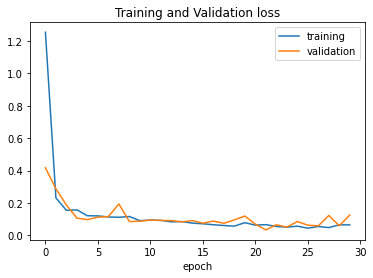

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

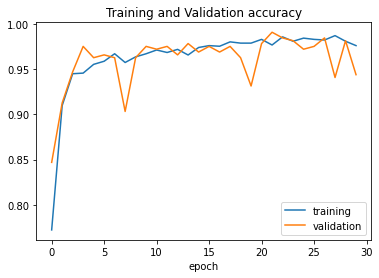

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_acc :{} test loss :{}'.format(test_acc,test_loss))

16/16 [==============================] - 10s 644ms/step - loss: 0.1931 - accuracy: 0.9112
test_acc :0.9111570119857788 test loss :0.19309014081954956


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  image = np.vstack([x])
  classes=model.predict(image,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid-19 affected')
  else:
    print('normal')

Saving WhatsApp Image 2020-12-23 at 1.03.23 PM (1).jpeg to WhatsApp Image 2020-12-23 at 1.03.23 PM (1).jpeg
/content/WhatsApp Image 2020-12-23 at 1.03.23 PM (1).jpeg
WhatsApp Image 2020-12-23 at 1.03.23 PM (1).jpeg
normal


./1609242353.h5


In [ ]:
model.save("sameersam")

TypeError: ignored

In [ ]:
> !git remote add origin https://<Sameer-Jain-hub>:<13@Sameer>@github.com/<Sameer-Jain-hub>/reponame.git

SyntaxError: ignored